<a href="https://colab.research.google.com/github/ysc4/CCMACLRL_EXERCISES_COM222-ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster
Reference: https://www.kaggle.com/competitions/titanic/data


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [ ]:
df = pd.read_csv('train.csv')
dt = pd.read_csv('test.csv')

df['train_dt'] = 1
dt['train_dt'] = 0
dt['Survived'] = np.NaN

all_data = pd.concat([df,dt])

In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_dt
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,1
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,1
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S,1
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S,1
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,1
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,1


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_dt
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_dt     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_dt     418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dt.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
df.duplicated().sum()

0

In [ ]:
dt.duplicated().sum()

0

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


## Data Visualization

In [ ]:
numeric_cols = df[['Age', 'SibSp', 'Parch', 'Fare']]
categorical_cols = df[['Survived', 'Pclass', 'Sex', 'Embarked']]

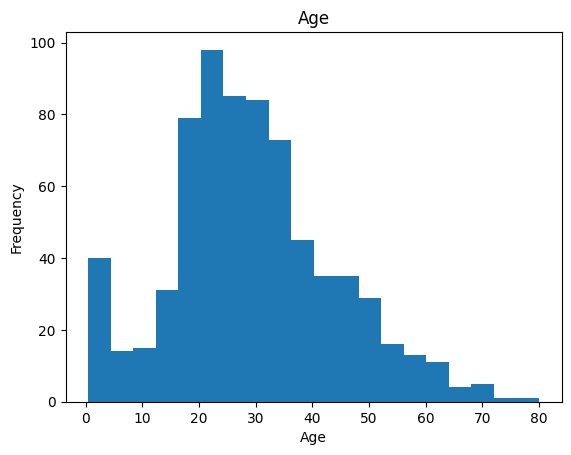

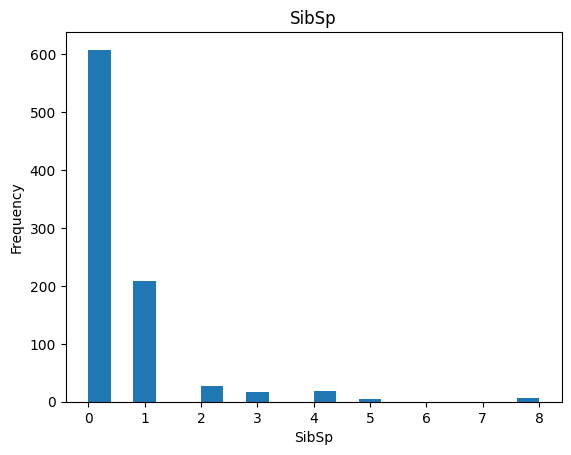

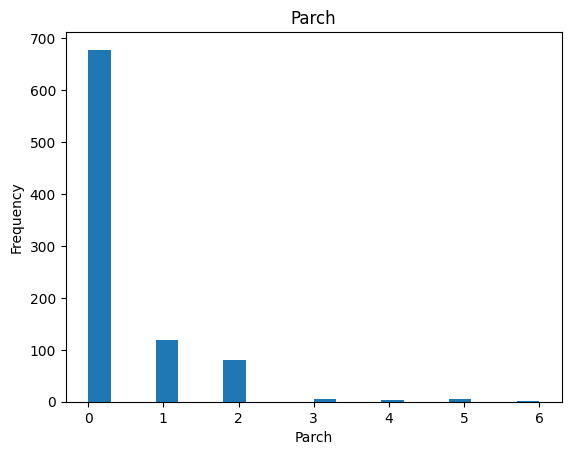

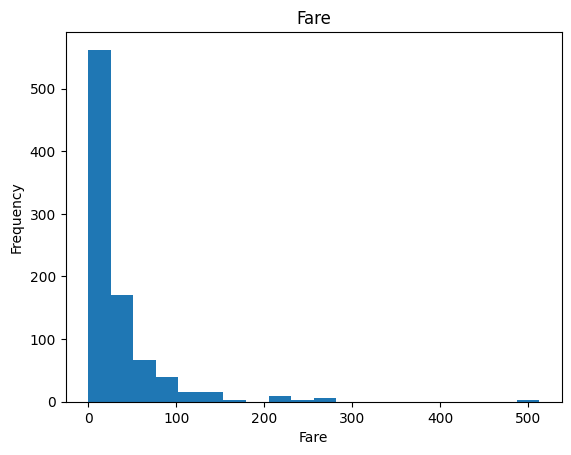

In [ ]:
for label in numeric_cols:
    plt.hist(df[label], bins=20)
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title(label)
    plt.show()

In [ ]:
numeric_cols.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


In [ ]:
pd.pivot_table(df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


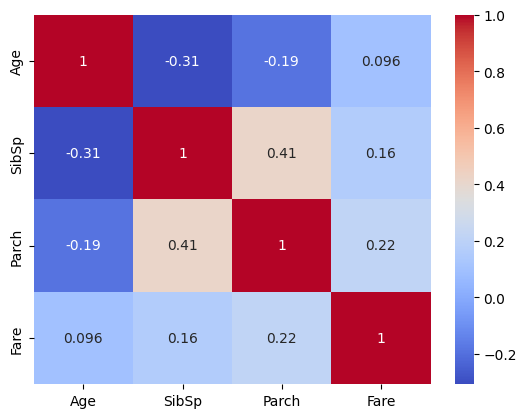

In [ ]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

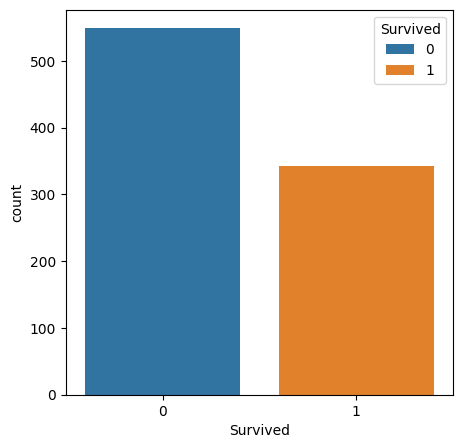

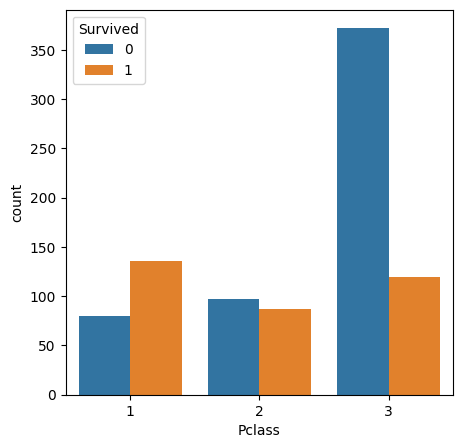

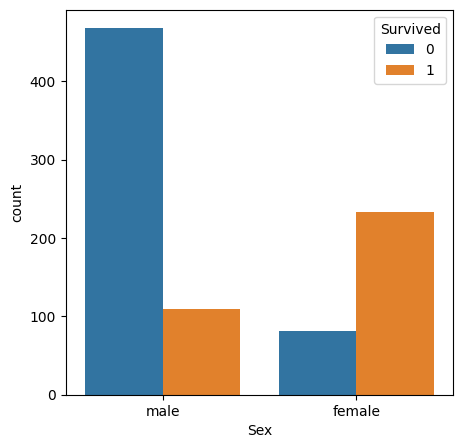

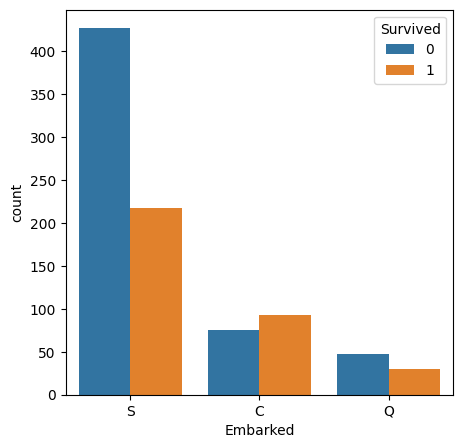

In [ ]:
for label in categorical_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=label, hue='Survived')

## Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_dt     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_multiple'].value_counts()

,count
cabin_multiple,
0,1014
1,254
2,26
3,10
4,5


In [ ]:
pd.pivot_table(all_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


In [ ]:
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])

In [ ]:
print(all_data['cabin_adv'].value_counts())

cabin_adv
n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [ ]:
pd.pivot_table(all_data,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [ ]:
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [ ]:
all_data['numeric_ticket'].value_counts()

,count
numeric_ticket,
1,957
0,352


In [ ]:
all_data['ticket_letters'].value_counts()

,count
ticket_letters,
0,961
pc,92
ca,68
a5,28
sotonoq,24
stono2,21
scparis,19
wc,15
a4,10


In [ ]:
pd.pivot_table(all_data, index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0.0,142,407
1.0,88,254


In [ ]:
pd.pivot_table(all_data,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1.0,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [ ]:
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
all_data['name_title'].value_counts()

,count
name_title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Major,2


In [ ]:
all_data["family_size"] = all_data["SibSp"] + all_data["Parch"]
all_data["family_size"].value_counts()

,count
family_size,
0,790
1,235
2,159
3,43
5,25
4,22
6,16
10,11
7,8


In [ ]:
pd.pivot_table(all_data,index='Survived',columns='family_size', values = 'Ticket', aggfunc='count')

family_size,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0.0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1.0,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


### Handling Missing Values

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  train_dt        1309 non-null   int64  
 13  cabin_multiple  1309 non-null   int64  
 14  cabin_adv       1309 non-null   object 
 15  numeric_ticket  1309 non-null   int64  
 16  ticket_letters  1309 non-null   object 
 17  name_title      1309 non-null   object 

In [ ]:
for Parch in all_data['Parch'].unique():
    all_data.loc[all_data['Parch'] == Parch, 'Age'] = all_data.loc[all_data['Parch'] == Parch, 'Age'].fillna(all_data.loc[all_data['Parch'] == Parch, 'Age'].mean())

In [ ]:
all_data['Cabin'].fillna('None reported', inplace=True)
all_data.dropna(subset=['Embarked'], inplace=True)
all_data['Fare'].fillna(all_data['Fare'].median(), inplace=True)

In [ ]:
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           1307 non-null   object 
 11  Embarked        1307 non-null   object 
 12  train_dt        1307 non-null   int64  
 13  cabin_multiple  1307 non-null   int64  
 14  cabin_adv       1307 non-null   object 
 15  numeric_ticket  1307 non-null   int64  
 16  ticket_letters  1307 non-null   object 
 17  name_title      1307 non-null   object 

In [ ]:
all_data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
def classify_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 50:
        return 'Middle-aged Adult'
    elif 51 <= age <= 65:
        return 'Older Adult'
    else:
        return 'Senior'

In [ ]:
all_data['age_group'] = all_data['Age'].apply(classify_age)

In [ ]:
all_data['age_group'].value_counts()

,count
age_group,
Young Adult,745
Middle-aged Adult,227
Teenager,147
Child,94
Older Adult,84
Senior,10


In [ ]:
pd.pivot_table(all_data,index='Survived',columns='age_group', values = 'Ticket', aggfunc='count')

age_group,Child,Middle-aged Adult,Older Adult,Senior,Teenager,Young Adult
Survived,,,,,,
0.0,29,92,35,7,67,319
1.0,40,60,20,1,40,179


In [ ]:
def evacuation_priority(row):
    if row['age_group'] == 'Child':
        return 1  # Highest priority
    elif row['Sex'] == 'female':
        if row['Pclass'] == 1:
            return 2  # Women in First Class
        elif row['Pclass'] == 2:
            return 3  # Women in Second Class
        else:
            return 4  # Women in Third Class
    else:  # Men
        if row['Pclass'] == 1:
            return 5  # Men in First Class
        elif row['Pclass'] == 2:
            return 6  # Men in Second Class
        else:
            return 7  # Men in Third Class (lowest priority)

In [ ]:
all_data['evacuation_priority'] = all_data.apply(evacuation_priority, axis=1)

In [ ]:
all_data['evacuation_priority'].value_counts()

,count
evacuation_priority,
7,458
4,186
5,175
6,160
2,141
1,94
3,93


In [ ]:
pd.pivot_table(all_data,index='Survived',columns='evacuation_priority', values = 'Ticket', aggfunc='count')

evacuation_priority,1,2,3,4,5,6,7
Survived,,,,,,,
0.0,29,2,6,60,77,91,284
1.0,40,89,62,61,42,8,38


### One-Hot Encoding and Scaling

<Axes: >

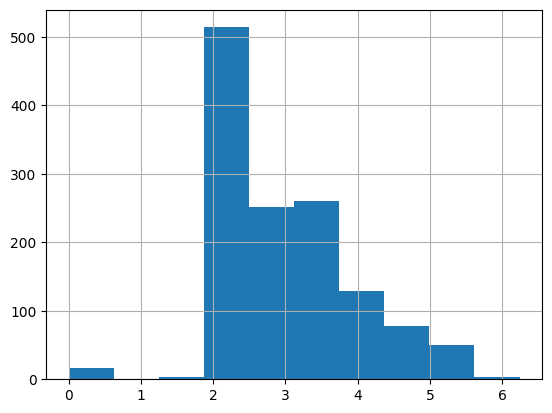

In [ ]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1307 non-null   int64  
 1   Survived             889 non-null    float64
 2   Pclass               1307 non-null   int64  
 3   Name                 1307 non-null   object 
 4   Sex                  1307 non-null   object 
 5   Age                  1307 non-null   float64
 6   SibSp                1307 non-null   int64  
 7   Parch                1307 non-null   int64  
 8   Ticket               1307 non-null   object 
 9   Fare                 1307 non-null   float64
 10  Cabin                1307 non-null   object 
 11  Embarked             1307 non-null   object 
 12  train_dt             1307 non-null   int64  
 13  cabin_multiple       1307 non-null   int64  
 14  cabin_adv            1307 non-null   object 
 15  numeric_ticket       1307 non-null   int64  

In [ ]:
all_data.drop(columns=['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
                       'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             889 non-null    float64
 1   Pclass               1307 non-null   int64  
 2   Embarked             1307 non-null   object 
 3   train_dt             1307 non-null   int64  
 4   cabin_multiple       1307 non-null   int64  
 5   cabin_adv            1307 non-null   object 
 6   numeric_ticket       1307 non-null   int64  
 7   ticket_letters       1307 non-null   object 
 8   name_title           1307 non-null   object 
 9   family_size          1307 non-null   int64  
 10  age_group            1307 non-null   object 
 11  evacuation_priority  1307 non-null   int64  
 12  norm_fare            1307 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 143.0+ KB


In [ ]:
features = ['Pclass', 'Embarked', 'cabin_adv', 'cabin_multiple', 'ticket_letters',
            'numeric_ticket', 'name_title', 'age_group', 'evacuation_priority', 'family_size',
            'norm_fare']

In [ ]:
# all_data.drop(columns=['Fare', 'SibSp', 'Parch', 'Age', 'Pclass', 'Sex', 'ticket_typ'], axis=1, inplace=True)

In [ ]:
categorical_cols = ['name_title', 'ticket_letters', 'cabin_adv']
'''numerical_cols = ['cabin_multiple', 'norm_fare', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size']
dummy_cols = ['cabin_adv', 'ticket_letters', 'Pclass', 'Sex', 'Embarked', 'age_group', 'evacuation_priority']'''

# numerical_cols = ['Age', 'SibSp', 'Parch', 'family_size', 'evacuation_priority']
# categorical_cols = ['Pclass', 'Sex', 'Embarked', 'cabin_adv', 'ticket_typ']


"numerical_cols = ['cabin_multiple', 'norm_fare', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size']\ndummy_cols = ['cabin_adv', 'ticket_letters', 'Pclass', 'Sex', 'Embarked', 'age_group', 'evacuation_priority']"

In [ ]:
'''scaler = StandardScaler()
all_data[numerical_cols] = scaler.fit_transform(all_data[numerical_cols])'''

'scaler = StandardScaler()\nall_data[numerical_cols] = scaler.fit_transform(all_data[numerical_cols])'

In [ ]:
'''le = LabelEncoder()
for col in categorical_cols:
    # Convert the column to string type before fitting the encoder
    all_data[col] = le.fit_transform(all_data[col].astype(str))'''

'le = LabelEncoder()\nfor col in categorical_cols:\n    # Convert the column to string type before fitting the encoder\n    all_data[col] = le.fit_transform(all_data[col].astype(str))'

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             889 non-null    float64
 1   Pclass               1307 non-null   int64  
 2   Embarked             1307 non-null   object 
 3   train_dt             1307 non-null   int64  
 4   cabin_multiple       1307 non-null   int64  
 5   cabin_adv            1307 non-null   object 
 6   numeric_ticket       1307 non-null   int64  
 7   ticket_letters       1307 non-null   object 
 8   name_title           1307 non-null   object 
 9   family_size          1307 non-null   int64  
 10  age_group            1307 non-null   object 
 11  evacuation_priority  1307 non-null   int64  
 12  norm_fare            1307 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 143.0+ KB


In [ ]:
all_data = pd.get_dummies(all_data, columns = features, drop_first=True)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Columns: 368 entries, Survived to norm_fare_6.240917354759096
dtypes: bool(366), float64(1), int64(1)
memory usage: 497.8 KB


In [ ]:
all_data.corr()['Survived'].abs().sort_values(ascending=False)

,Survived
Survived,1.000000
name_title_Mr,0.547689
evacuation_priority_2,0.413836
evacuation_priority_7,0.410052
name_title_Mrs,0.337892
...,...
norm_fare_4.073291153024268,NaN
norm_fare_4.110873864173311,NaN
norm_fare_4.333908557103646,NaN
norm_fare_4.422048709343544,NaN


## Model Training

In [ ]:
train_df = all_data[all_data['train_dt'] == 1]
test_df = all_data[all_data['train_dt'] == 0]

train_df.drop(columns=['train_dt'], axis=1, inplace=True)
test_df.drop(columns=['Survived', 'train_dt'], axis=1, inplace=True)

X = train_df.drop(columns=['Survived'], axis=1)
y = train_df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(711, 366) (178, 366)
(711,) (178,)


In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

## Model Testing and Metrics

In [ ]:
y_pred = lg_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 19]
 [14 55]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       109
         1.0       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [ ]:
print(accuracy_score(y_test, y_pred))

0.8146067415730337


## Submission File

In [ ]:
sf = pd.read_csv('gender_submission.csv')
sf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
id = sf.pop('PassengerId')
y_pred = lg_model.predict(test_df)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred.astype(int)
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


In [ ]:
submission = pd.read_csv('submission_file.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
